# Python TFM Section

## Modelling I

1. Explore different metrics, and choose the one 
2. Compare several models and find the most suitable for this regression project
3. Discover sklearn tools for machine learning appart from models per se. 


In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
%pylab inline
plt.style.use('ggplot')
from pathlib import Path
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_modelize = pd.read_csv(Path.cwd() / 'Outputs' / 'DF_MODELIZE.csv', sep = ';', header = 0 , encoding = "ISO-8859-1",decimal=',')
df_modelize.head(5)

,VERSION,ID_UPR,ID_TECNOLOGIA,A. No Cobrados,AMONIACO,ATR,Ajuste,BONO_SOCIAL_PEGO,Banda,Bilateral,...,Res. Pot. Adicional,S. Regulacion,S. Res. Pot. Adicional,SERV_GEST_RES,TASAS_MEDIOAMB,TASA_ARAGON,Terciaria,UREA,VCF,POWER_MWH
0,201701,UPR115,NC,NaN,NaN,NaN,NaN,NaN,NaN,81778497.0,...,NaN,NaN,-36.0,-5156083.0,NaN,NaN,NaN,NaN,NaN,1111803.766
1,201701,UPR116,NC,NaN,NaN,NaN,NaN,NaN,NaN,68455391.0,...,NaN,NaN,NaN,-4357224.0,NaN,NaN,NaN,NaN,NaN,940091.558
2,201701,UPR1198,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-192.0,NaN,NaN,NaN,NaN,NaN,NaN,-1418.032
3,201701,UPR1205,EB,NaN,NaN,NaN,-124366.0,NaN,NaN,1578792.0,...,NaN,NaN,-455.0,NaN,-33711.0,NaN,55144.0,NaN,NaN,22830.702
4,201701,UPR1206,BX,NaN,NaN,NaN,-9972.0,NaN,NaN,NaN,...,NaN,NaN,-7.0,NaN,-16346.0,NaN,NaN,NaN,NaN,-418.593


Before aplying any model:

1. All NaNs are now filled with 0s 
2. I will create a synthetic column named INTEGRAL_MARGIN with the sum of all the euros 
3. I will inspect the graphical aspect of the data
4. After watching it, I decided to drop all the outliers of every column and watch it again

In [3]:
df_modelize2 = df_modelize.fillna(0)

df_modelize2['INTEGRAL_MARGIN']  = \
df_modelize2['A. No Cobrados'] + \
df_modelize2['AMONIACO'] + \
df_modelize2['ATR'] + \
df_modelize2['Ajuste'] + \
df_modelize2['BONO_SOCIAL_PEGO'] + \
df_modelize2['Banda'] + \
df_modelize2['Bilateral'] + \
df_modelize2['CALIZAS'] + \
df_modelize2['CANON HID'] + \
df_modelize2['CANON_CONCESION'] + \
df_modelize2['CANON_HID_CATALUÃÂA'] + \
df_modelize2['CANON_NC_CATALUÃÂA'] + \
df_modelize2['CANON_NC_EST'] + \
df_modelize2['CENTIMO_VERDE'] + \
df_modelize2['COSTE_COMBUSTIBLE'] + \
df_modelize2['D. Medida Contador'] + \
df_modelize2['G. Desvios'] + \
df_modelize2['G. Potencia LP'] + \
df_modelize2['G. Potencia MP'] + \
df_modelize2['I. G. DesvÃ­os y Terciaria'] + \
df_modelize2['I. R. Cobertura'] +  \
df_modelize2['I. Res. Pot. Adicional'] + \
df_modelize2['IMPUESTO ELECT'] + \
df_modelize2['LUBRICANTES'] + \
df_modelize2['M. Diario'] + \
df_modelize2['M. Intradiario Continuo'] + \
df_modelize2['M. Intradiarios'] + \
df_modelize2['OTROS'] + \
df_modelize2['PEAJE GEN'] +  \
df_modelize2['R. Cobertura'] + \
df_modelize2['R. Secundaria'] + \
df_modelize2['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize2['Redespachos'] + \
df_modelize2['Res. Pot. Adicional'] +  \
df_modelize2['S. Regulacion'] + \
df_modelize2['S. Res. Pot. Adicional'] + \
df_modelize2['SERV_GEST_RES'] + \
df_modelize2['TASAS_MEDIOAMB'] + \
df_modelize2['TASA_ARAGON'] + \
df_modelize2['Terciaria'] + \
df_modelize2['VCF'] 

df_modelize2.head(10)

,VERSION,ID_UPR,ID_TECNOLOGIA,A. No Cobrados,AMONIACO,ATR,Ajuste,BONO_SOCIAL_PEGO,Banda,Bilateral,...,S. Regulacion,S. Res. Pot. Adicional,SERV_GEST_RES,TASAS_MEDIOAMB,TASA_ARAGON,Terciaria,UREA,VCF,POWER_MWH,INTEGRAL_MARGIN
0,201701,UPR115,NC,0.0,0.0,0.0,0.0,0.0,0.0,81778497.0,...,0.0,-36.0,-5156083.0,0.0,0.0,0.0,0.0,0.0,1111803.766,68991367.0
1,201701,UPR116,NC,0.0,0.0,0.0,0.0,0.0,0.0,68455391.0,...,0.0,0.0,-4357224.0,0.0,0.0,0.0,0.0,0.0,940091.558,57329124.0
2,201701,UPR1198,NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-192.0,0.0,0.0,0.0,0.0,0.0,0.0,-1418.032,-35497.0
3,201701,UPR1205,EB,0.0,0.0,0.0,-124366.0,0.0,0.0,1578792.0,...,0.0,-455.0,0.0,-33711.0,0.0,55144.0,0.0,0.0,22830.702,1628652.0
4,201701,UPR1206,BX,0.0,0.0,0.0,-9972.0,0.0,0.0,0.0,...,0.0,-7.0,0.0,-16346.0,0.0,0.0,0.0,0.0,-418.593,-40860.0
5,201701,UPR1207,EB,0.0,0.0,0.0,-198314.0,0.0,15066.0,59653.0,...,0.0,-807.0,0.0,-1528.0,0.0,225821.0,0.0,999.0,11909.436,1165056.0
6,201701,UPR1314,BP,0.0,0.0,0.0,-429377.0,0.0,0.0,-118383.0,...,0.0,-39.0,0.0,0.0,0.0,-24031.0,0.0,0.0,-13631.195,-687111.0
7,201701,UPR1315,BP,0.0,0.0,0.0,-506708.0,0.0,2001.0,0.0,...,0.0,-397.0,0.0,0.0,0.0,441646.0,0.0,-162.0,10253.552,933419.0
8,201701,UPR160,GN,-994654.0,0.0,-938689.0,0.0,0.0,1045907.0,0.0,...,0.0,-2223.0,0.0,0.0,0.0,251416.0,0.0,-14892.0,84359.878,5616333.0
9,201701,UPR162,GN,-418200.0,0.0,-507356.0,0.0,0.0,957825.0,0.0,...,0.0,-316.0,0.0,0.0,0.0,573346.0,0.0,-17674.0,109060.598,13326546.0


In [4]:
df_modelize2 = df_modelize2[['ID_TECNOLOGIA','POWER_MWH','INTEGRAL_MARGIN']]
df_tech= df_modelize2[['ID_TECNOLOGIA']].drop_duplicates()
df_tech['NUM_TECH']= [1,2,3,4,5,6,7,8]
df_tech.reset_index
df_modelize2 = pd.merge(df_modelize2, df_tech, on=['ID_TECNOLOGIA'], how='left')
df_modelize2 = df_modelize2[['POWER_MWH','INTEGRAL_MARGIN','NUM_TECH']]


df_modelize2.sort_values('INTEGRAL_MARGIN').tail(5)

,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
872,25252754.63,1.786557e+09,1
1000,30433835.04,1.852227e+09,1
828,29264447.52,1.863768e+09,1
913,32620485.17,2.102639e+09,1
871,29867406.09,2.108922e+09,1


I represent all the data graphically for watching the distribution and see how prone to be clustered those centrals are. 

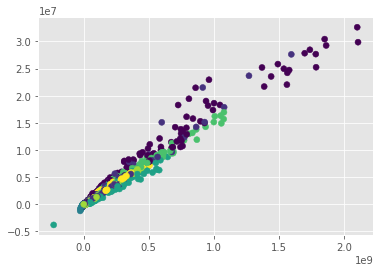

In [5]:
plt.scatter(df_modelize2['INTEGRAL_MARGIN'],df_modelize2['POWER_MWH'],c=df_modelize2['NUM_TECH'])

I discard the outliers which are bigger than 2 times the standard desviation, that means keeping the percentile 95 of every data.

I used directly the fuction zcore from stats to have the calcule directly instead of using the mean and the standard deviation.

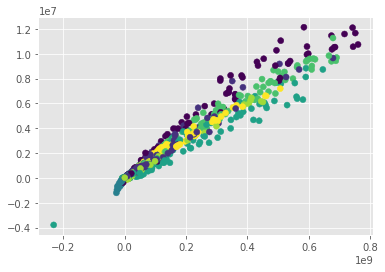

In [6]:
from scipy import stats
df_modelize3= df_modelize2[(np.abs(stats.zscore(df_modelize2)) < 2).all(axis=1)].reset_index()
plt.scatter(df_modelize3['INTEGRAL_MARGIN'],df_modelize3['POWER_MWH'],c=df_modelize3['NUM_TECH'])

There are still some values too low that I don't want to take into account , so I will drop it manually

In [7]:
df_modelize3.sort_values('INTEGRAL_MARGIN').head(3)

,index,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
761,784,-3789073.00,-230711843.0,5
610,623,-1206169.48,-26556006.0,4
650,666,-968546.08,-24686687.0,4


In [8]:
df_modelize3=df_modelize3.drop(df_modelize3.index[761])

In [9]:
df_modelize3.sort_values('INTEGRAL_MARGIN').head(3)

,index,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
610,623,-1206169.480,-26556006.0,4
650,666,-968546.080,-24686687.0,4
509,513,-682677.543,-23179375.0,4


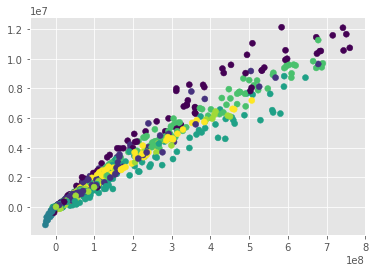

In [10]:
plt.scatter(df_modelize3['INTEGRAL_MARGIN'],df_modelize3['POWER_MWH'],c=df_modelize3['NUM_TECH'])

From this representation, seems clear than the behaviour of the different technologies is pretty similar when at first I supposed **it won't!!** Let's go look for the meaning of this

1. I apply a matrix correlation to see how much weight does the different costs and profits to the integral margin
2. We see that the profits are extremely hight against the costs.
    - Since every technology is sold with the same price in the electric market no matter what are it's implied costs, the profits columns does not really matter in the proces of predicting 
3. We recalculate now the margin but only with the costs-part selected



In [11]:
print(df_modelize.corr())

                             VERSION  A. No Cobrados  AMONIACO       ATR  \
VERSION                     1.000000        0.084253 -0.227207 -0.183709   
A. No Cobrados              0.084253        1.000000       NaN -0.284638   
AMONIACO                   -0.227207             NaN  1.000000  0.278200   
ATR                        -0.183709       -0.284638  0.278200  1.000000   
Ajuste                     -0.224715       -0.297457  0.082503 -0.235808   
BONO_SOCIAL_PEGO           -0.435588             NaN       NaN  0.009810   
Banda                       0.285243       -0.020102 -0.511209 -0.452223   
Bilateral                   0.306330       -1.000000 -0.128096  0.095534   
CALIZAS                    -0.210090             NaN  0.576934 -0.051639   
CANON HID                  -0.174648             NaN       NaN       NaN   
CANON_CONCESION            -0.052610             NaN -0.438433  0.547675   
CANON_HID_CATALUÃÂA       0.039441             NaN       NaN       NaN   
CANON_NC_CAT

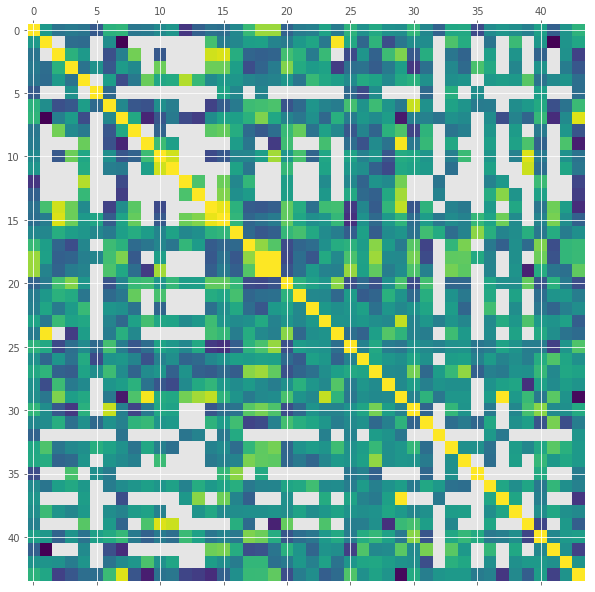

In [12]:
plt.figure(figsize=(20,10))
plt.matshow(df_modelize.corr(),fignum=1)

I will repeat the whole previous process altogether for having the new distribution of costs for technology

In addition, some more transformations will be done before aplying any model:

1. All NaNs are now filled with 0s 
2. I will create a synthetic column named INTEGRAL_COSTS summing every single cost column
3. Let's drop all the outliers and negative values
4. I filter by the technologie, dropping technologies 3 and 4 for being Bx and Bp
3. I will inspect the graphical aspect of the data INTEGRAL_COSTS vs POWER_MWH

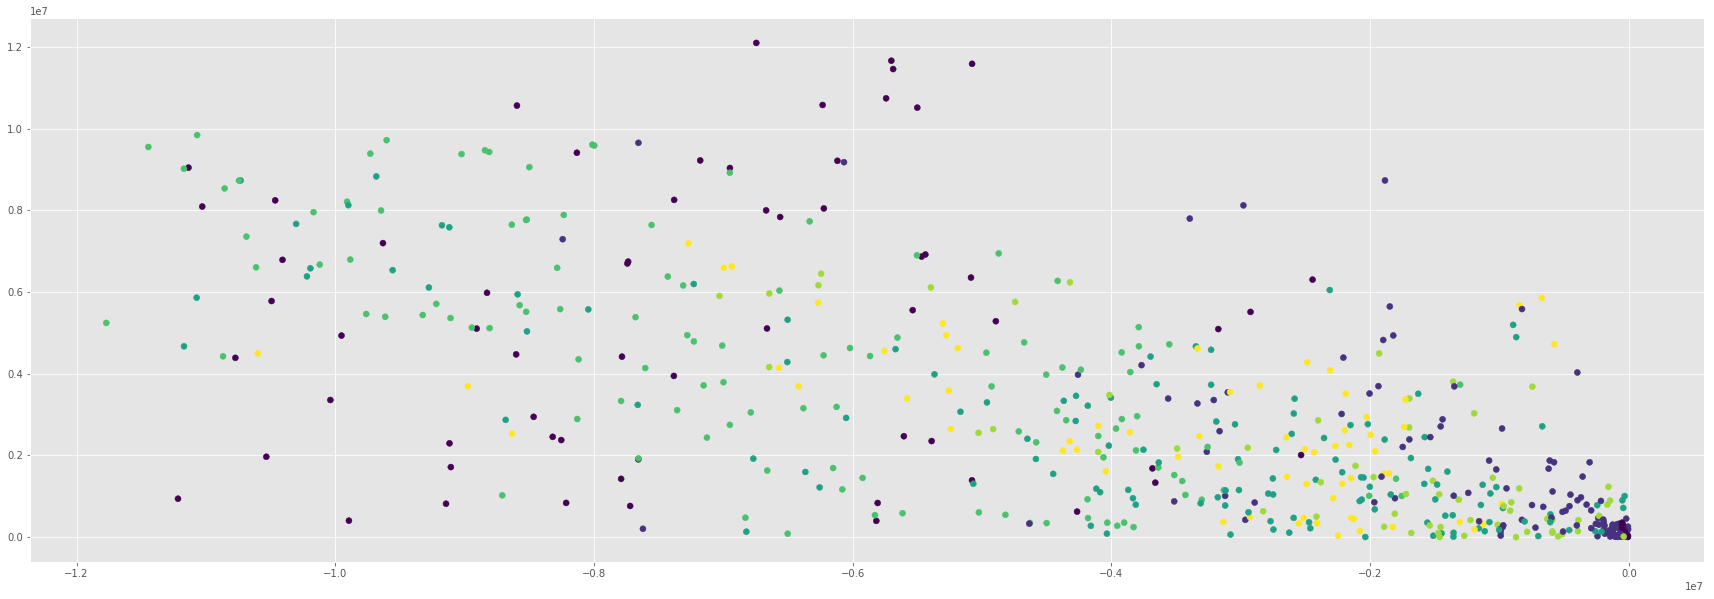

In [13]:
df_modelize3 = df_modelize.fillna(0)

df_modelize3['INTEGRAL_COSTS']  = \
df_modelize3['AMONIACO'] + \
df_modelize3['ATR'] + \
df_modelize3['BONO_SOCIAL_PEGO'] + \
df_modelize3['CALIZAS'] + \
df_modelize3['CANON HID'] + \
df_modelize3['CANON_CONCESION'] + \
df_modelize3['CANON_HID_CATALUÃÂA'] + \
df_modelize3['CANON_NC_CATALUÃÂA'] + \
df_modelize3['CANON_NC_EST'] + \
df_modelize3['CENTIMO_VERDE'] + \
df_modelize3['COSTE_COMBUSTIBLE'] + \
df_modelize3['IMPUESTO ELECT'] + \
df_modelize3['LUBRICANTES'] + \
df_modelize3['OTROS'] + \
df_modelize3['PEAJE GEN'] +  \
df_modelize3['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize3['SERV_GEST_RES'] + \
df_modelize3['TASAS_MEDIOAMB'] + \
df_modelize3['TASA_ARAGON'] 



df_modelize3 = df_modelize3[['VERSION','ID_TECNOLOGIA','POWER_MWH','INTEGRAL_COSTS']]
df_tech= df_modelize3[['ID_TECNOLOGIA']].drop_duplicates()
df_tech['NUM_TECH']= [1,2,3,4,5,6,7,8]
df_tech.reset_index
df_modelize3 = pd.merge(df_modelize3, df_tech, on=['ID_TECNOLOGIA'], how='left')
# df_modelize5['UNITARY_COST'] = df_modelize4['INTEGRAL_COSTS'] / df_modelize4['POWER_MWH']
df_modelize3 = df_modelize3[['VERSION','POWER_MWH','INTEGRAL_COSTS','NUM_TECH']]


df_modelize3= df_modelize3[(np.abs(stats.zscore(df_modelize3)) < 2).all(axis=1)].reset_index()
df_modelize3 = df_modelize3[['VERSION','POWER_MWH','INTEGRAL_COSTS','NUM_TECH']]
df_modelize3 = df_modelize3[(df_modelize3['POWER_MWH']>0)]
df_modelize3 = df_modelize3[(df_modelize3['INTEGRAL_COSTS']<0)]
df_modelize3 = df_modelize3[df_modelize3['NUM_TECH'] != 3]
df_modelize3 = df_modelize3[df_modelize3['NUM_TECH'] != 4]

plt.show(figsize(30,10))
plt.scatter(df_modelize3['INTEGRAL_COSTS'],df_modelize3['POWER_MWH'],c=df_modelize3['NUM_TECH'])

Or even take a look into the aspect of costs vs power for each technology remaining during the time

Remember to enter the number (and not the code) of the technology you are interested in.

|  ID_TECNOLOGIA  |  NUM_TECH  |
|-----------------|------------|
|Nuclear          |     1      |
|Embalse          |     2      |
|Bombeo Mixto     |     3      |
|Bombeo Puro      |     4      |
|Gas Natural      |     5      |
|Carbon Importado |     6      |
|Hulla Nacional   |     7      |
|Lignito Negro    |     8      |


Remember as well that both pups has been removed so number 3 and 4 does't return any result


7


C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


   ID_TECNOLOGIA  NUM_TECH
0             NC         1
3             EB         2
4             BX         3
6             BP         4
8             GN         5
10            CI         6
21            HN         7
27            LN         8


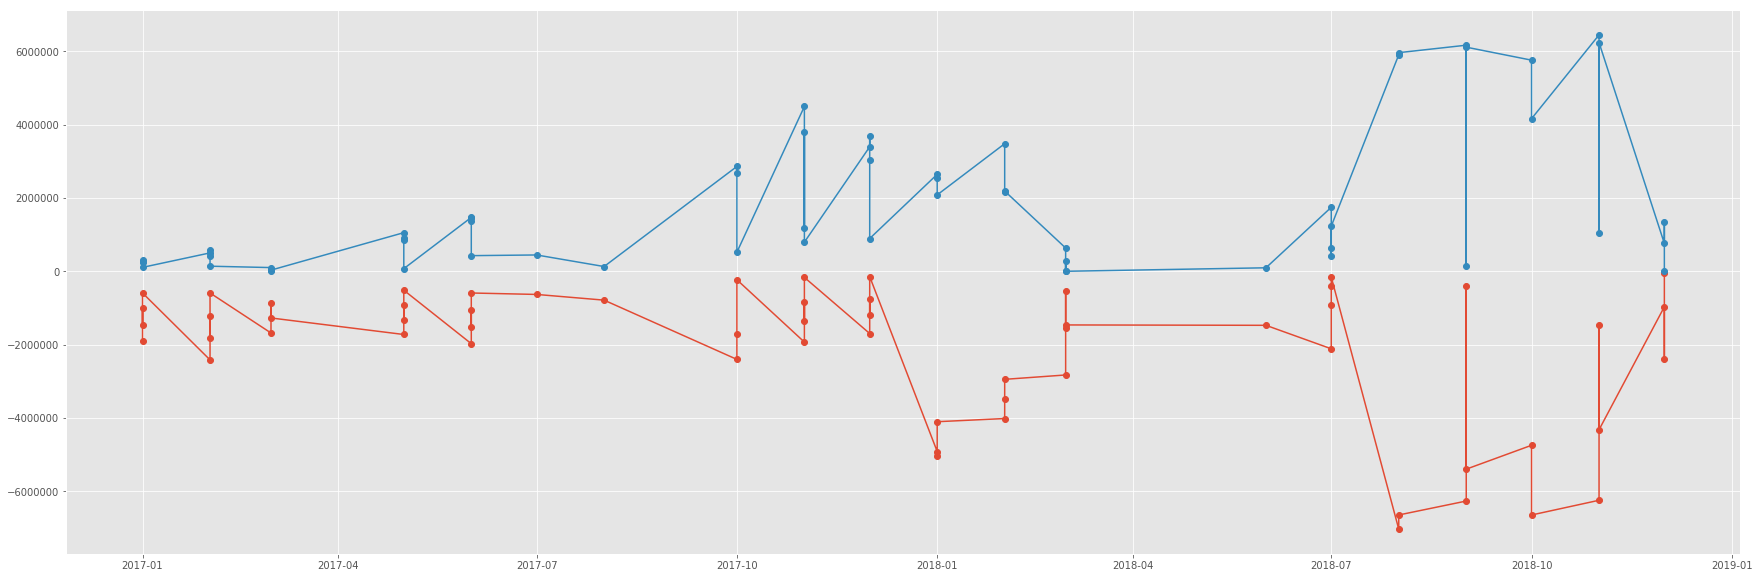

In [15]:
df_temp = df_modelize3[['VERSION', 'POWER_MWH', 'INTEGRAL_COSTS', 'NUM_TECH']]
df_temp['VERSION'] = pd.to_datetime(df_temp['VERSION'], format='%Y%m', errors='coerce').dropna()
#
tech = int(input())

plt.show(figsize(30,10))
plt.plot(df_temp[df_temp['NUM_TECH'] == tech]['VERSION'], df_temp[df_temp['NUM_TECH'] == tech]['INTEGRAL_COSTS'], '-o')
plt.plot(df_temp[df_temp['NUM_TECH'] == tech]['VERSION'], df_temp[df_temp['NUM_TECH'] == tech]['POWER_MWH'], '-o')
print(df_tech)


# Model Aplication

First, I proceed to separate the data frame into Train-Test parts

For that, I divide the original df into two parts with the inputs on the matrix X and the outputs desired on the matrix y and the metric used for the evaluation at first will be MAE

## Instances Creation

In [16]:
# Import Library
from sklearn.model_selection import train_test_split

X = df_modelize3[['VERSION','NUM_TECH','POWER_MWH']]
y = df_modelize3['INTEGRAL_COSTS']


# Create Instance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10 , random_state = 42)

## First aproach: Linear Regressor

In [17]:
# Load the library
from sklearn.linear_model import LinearRegression
# Create an instance of the model
regL = LinearRegression()
# Fit the regressor
regL.fit(X_train,y_train)
# Do predictions
y_regL_pred = regL.predict(X_test)

Let's check the mean absolute error as well as the distribution of the diferences between the test and the predictions

1753703.436361595
Mean error represents  -47 % from the mean value


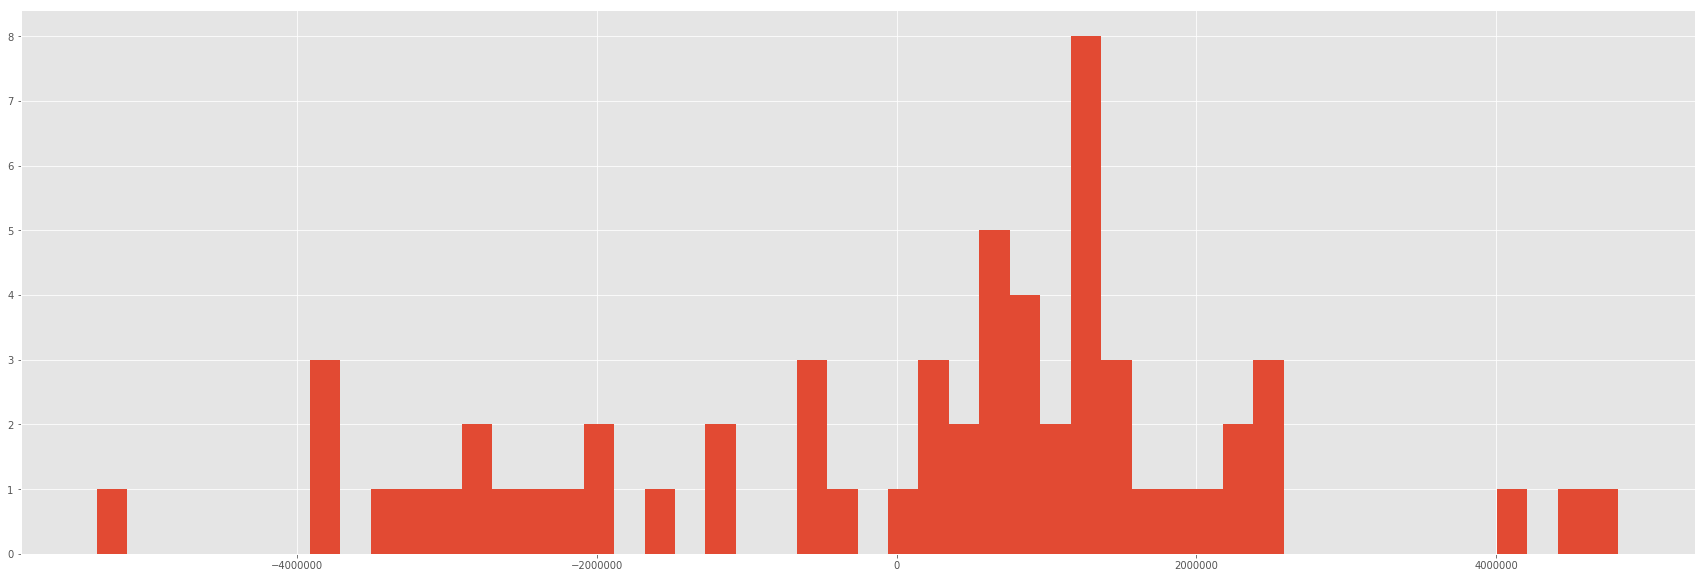

In [18]:
print(np.mean(np.abs(y_test-y_regL_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regL_pred))/df_modelize3['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regL_pred,bins=50);

## Second Aproach: KNeighbors

In [19]:
# Load the library
from sklearn.neighbors import KNeighborsRegressor
# Create an instance
regKN = KNeighborsRegressor(n_neighbors=15)
# Fit the data
regKN.fit(X_train,y_train)
# Do predictions
y_regKN_pred = regKN.predict(X_test)

1750167.6022222224
Mean error represents  -47 % from the mean value


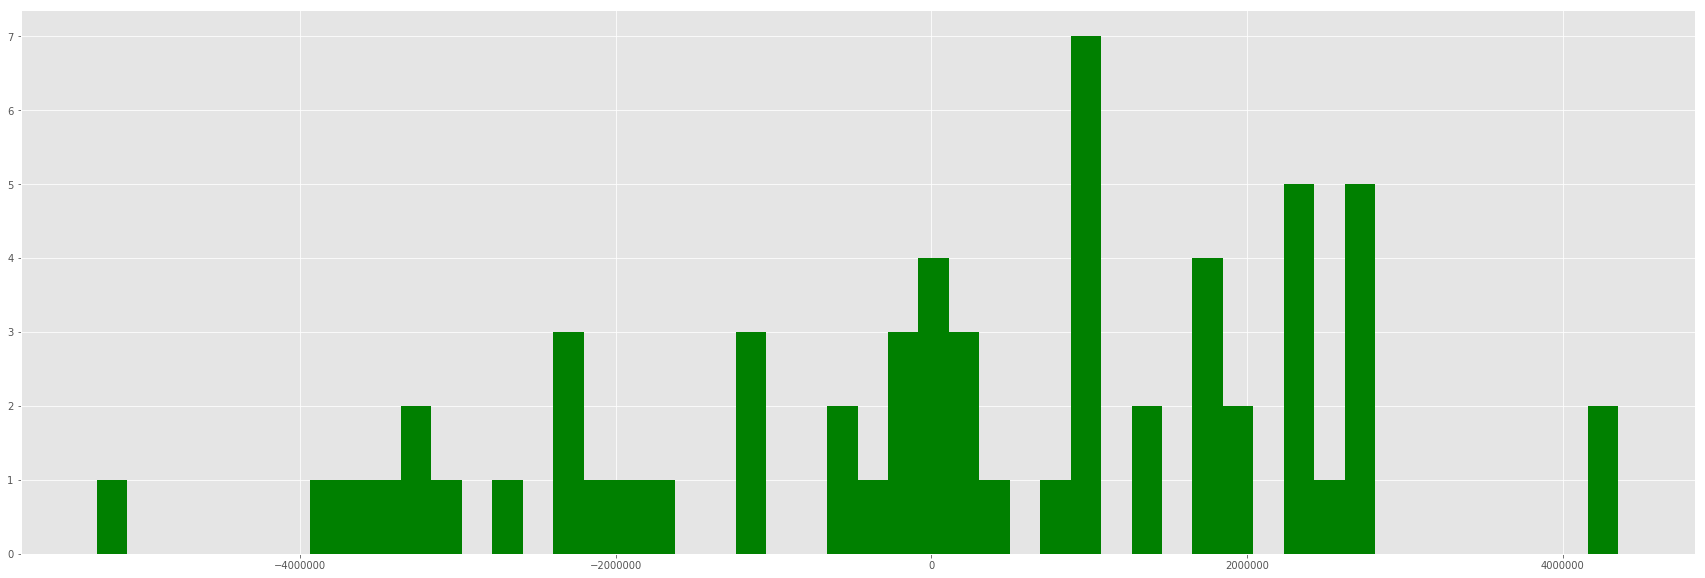

In [20]:
print(np.mean(np.abs(y_test-y_regKN_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regKN_pred))/df_modelize3['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regKN_pred,color = "g",bins=50);

Let's apply a GridSearchCV to see how this could be improved

In [21]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Create instance
regGsCvKN = GridSearchCV(KNeighborsRegressor(),
                  param_grid = {"n_neighbors":np.arange(3,50)},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  verbose=9)
                     
                      
# Fit will test all of the combinations
regGsCvKN.fit(X,y)


print(regGsCvKN.best_params_)
print(regGsCvKN.best_score_)

Fitting 5 folds for each of 47 candidates, totalling 235 fits
[CV] n_neighbors=3 ...................................................
[CV] ......... n_neighbors=3, score=-1983097.2072829132, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-1768296.512605042, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ......... n_neighbors=3, score=-2109317.0677966103, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ......... n_neighbors=3, score=-1959962.1694915255, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ......... n_neighbors=3, score=-1780023.0762711861, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ......... n_neighbors=4, score=-1985433.3991596638, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=-1994346.480192077, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] ......... n_neighbors=7, score=-1580149.7394957982, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] ......... n_neighbors=7, score=-1946075.1743341405, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] ......... n_neighbors=7, score=-1832057.8026634385, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] ......... n_neighbors=7, score=-1775703.7687651336, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ......... n_neighbors=8, score=-1998285.5682773108, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ......... n_neighbors=8, score=-1548824.5976890756, total=   0.0s
[CV] 

[CV] ........ n_neighbors=19, score=-1826589.7957181085, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ........ n_neighbors=19, score=-1756546.4330954505, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ........ n_neighbors=20, score=-2003763.4840336135, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ........ n_neighbors=20, score=-1595885.3714285716, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ........ n_neighbors=20, score=-1913896.6805084746, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ........ n_neighbors=20, score=-1815152.6919491524, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ......... n_neighbors=20, score=-1770544.595762712, total=   0.0s
[CV] n_neighbors=21 ..................................................
[CV] .

[CV] ........ n_neighbors=32, score=-1791895.1207627119, total=   0.0s
[CV] n_neighbors=32 ..................................................
[CV] ........ n_neighbors=32, score=-1727770.4192266949, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ......... n_neighbors=33, score=-2011439.600458365, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ......... n_neighbors=33, score=-1565092.361344538, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ........ n_neighbors=33, score=-1891912.6153055984, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ........ n_neighbors=33, score=-1798009.3495120702, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ........ n_neighbors=33, score=-1730559.6815613764, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] .

[CV] n_neighbors=44 ..................................................
[CV] ........ n_neighbors=44, score=-1743948.2652157166, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ........ n_neighbors=45, score=-1995716.4857142856, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ........ n_neighbors=45, score=-1554726.2212885155, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ......... n_neighbors=45, score=-1895351.694915254, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ........ n_neighbors=45, score=-1754925.3758945384, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ........ n_neighbors=45, score=-1754684.5939736343, total=   0.0s
[CV] n_neighbors=46 ..................................................
[CV] ........ n_neighbors=46, score=-1997577.3222506398, total=   0.0s
[CV] n

[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    2.1s finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
regGsKN = regGsCvKN.best_estimator_
# Do predictions
y_regGsKN_pred = regGsKN.predict(X_test)

1710828.790816327
Mean error represents  -46 % from the mean value


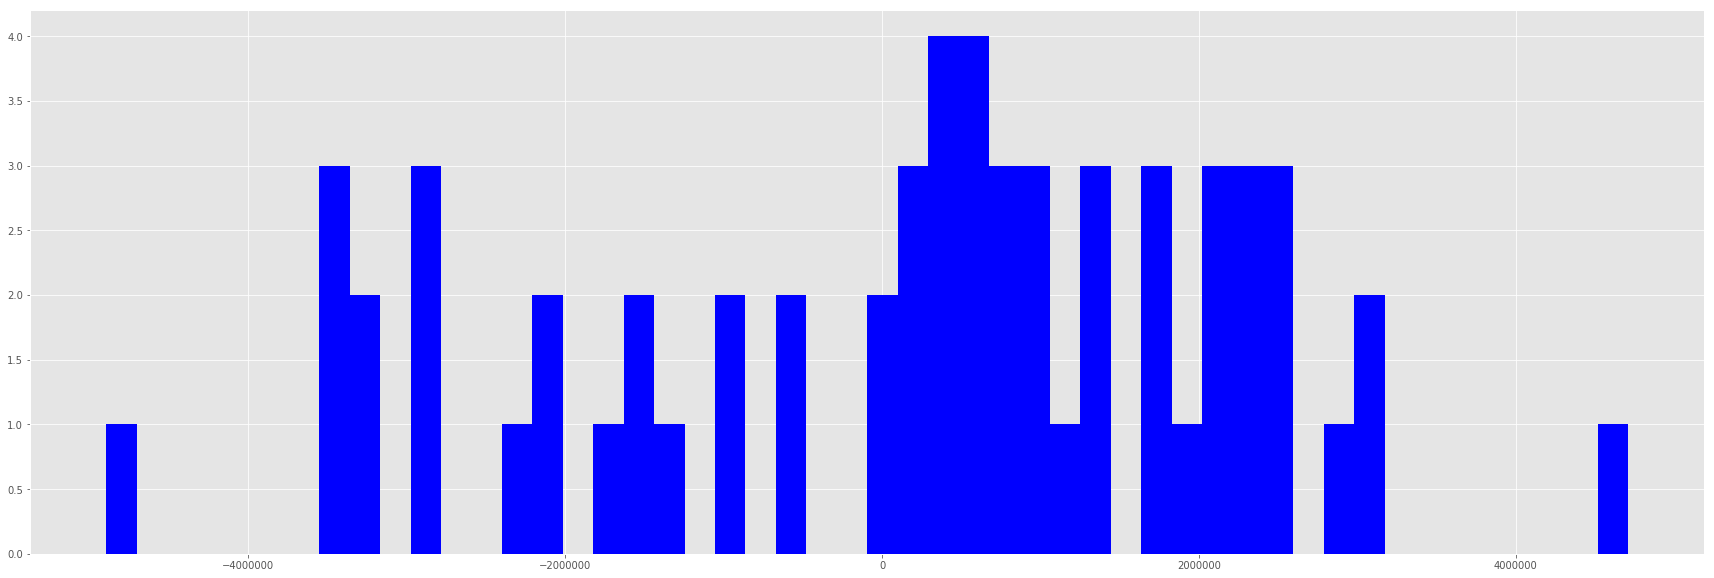

In [23]:
print(np.mean(np.abs(y_test-y_regGsKN_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regGsKN_pred))/df_modelize3['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regGsKN_pred,color = "b",bins=50);

## Third: Support Vector Machine Regression

C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2655209.9
Mean error represents  -71 % from the mean value


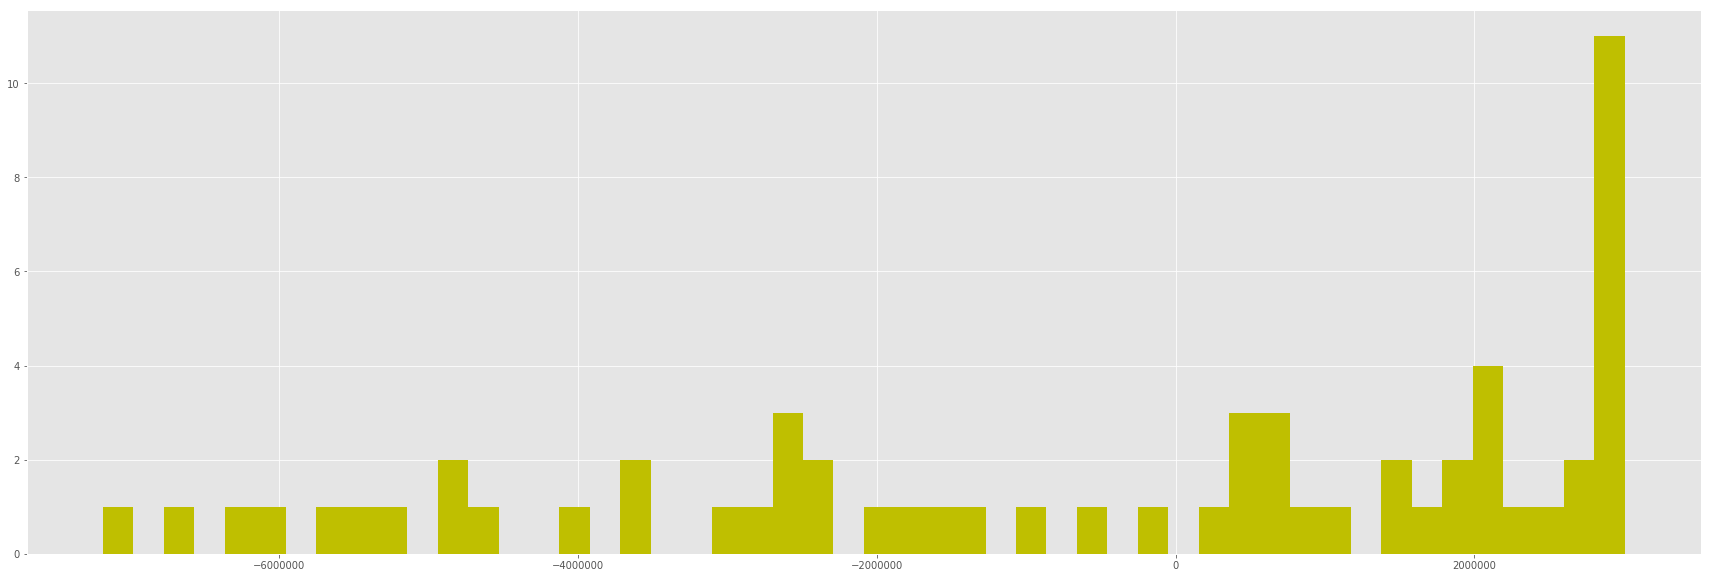

In [24]:
# Load the library
from sklearn.svm import SVR
# Create an instance
regSVR = SVR(kernel="rbf",C=0.1)
# Fit the data
regSVR.fit(X_train,y_train)

# Do predictions
y_regSVR_pred = regSVR.predict(X_test)


print(np.mean(np.abs(y_test-y_regSVR_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regSVR_pred))/df_modelize3['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regSVR_pred,color = "y",bins=50);

## And last , but not least: Decision Trees

In this section, we will compare from a single decision tree, passing by a random forest untill a XGboost

### Single Decision Tree

In [25]:
# Load the library
from sklearn.tree import DecisionTreeRegressor
# Create an instance
regDT = DecisionTreeRegressor(max_depth=10)
# Fit the data
regDT.fit(X_train,y_train)
# Do predictions
y_regDT_pred = regDT.predict(X_test)

1186493.250793651
Mean error represents  -32 % from the mean value


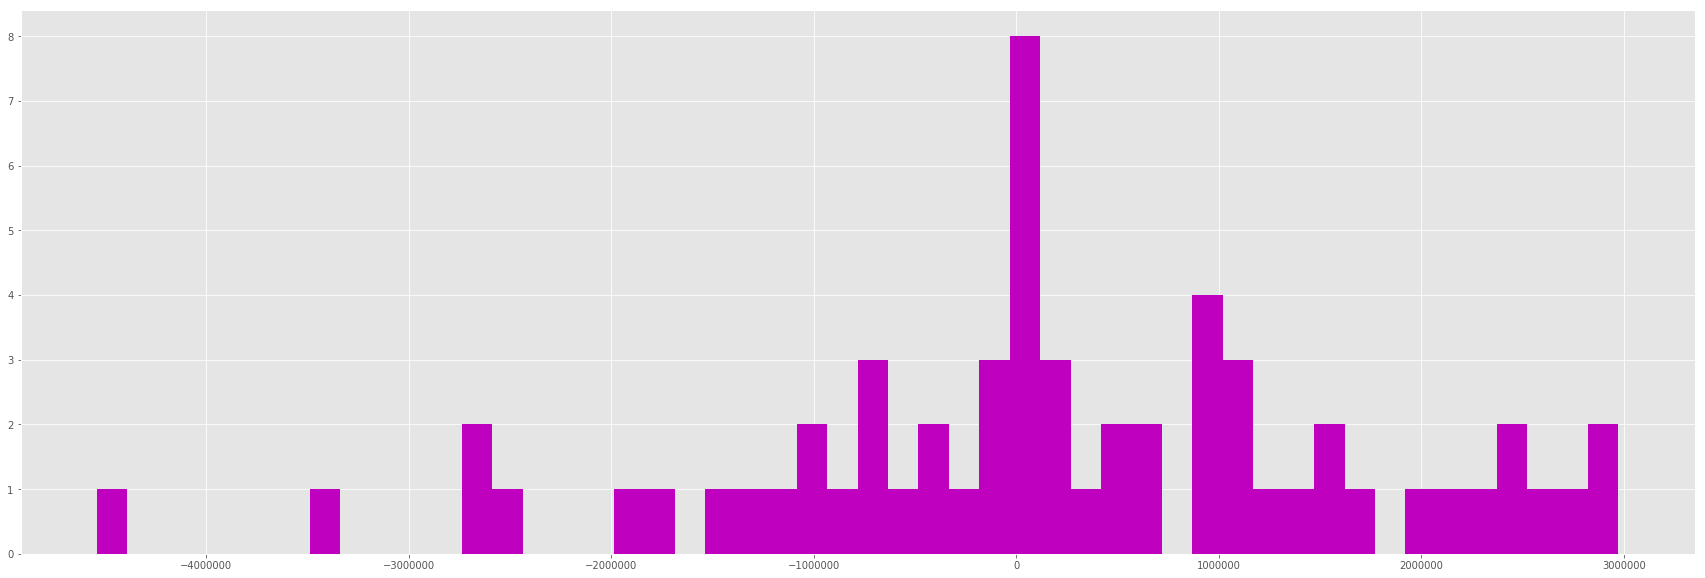

In [26]:
print(np.mean(np.abs(y_test-y_regDT_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regDT_pred))/df_modelize3['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regDT_pred,color = "m",bins=50);

### Random forest

Now a random forest with GridSearchCV for finding the best parametres possible

Fitting 5 folds for each of 51 candidates, totalling 255 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:  1.1min finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set size

{'max_depth': 18, 'min_samples_leaf': 1, 'n_estimators': 500}
-1064973.878948286
1082051.7643291664
Mean error represents  -29 % from the mean value


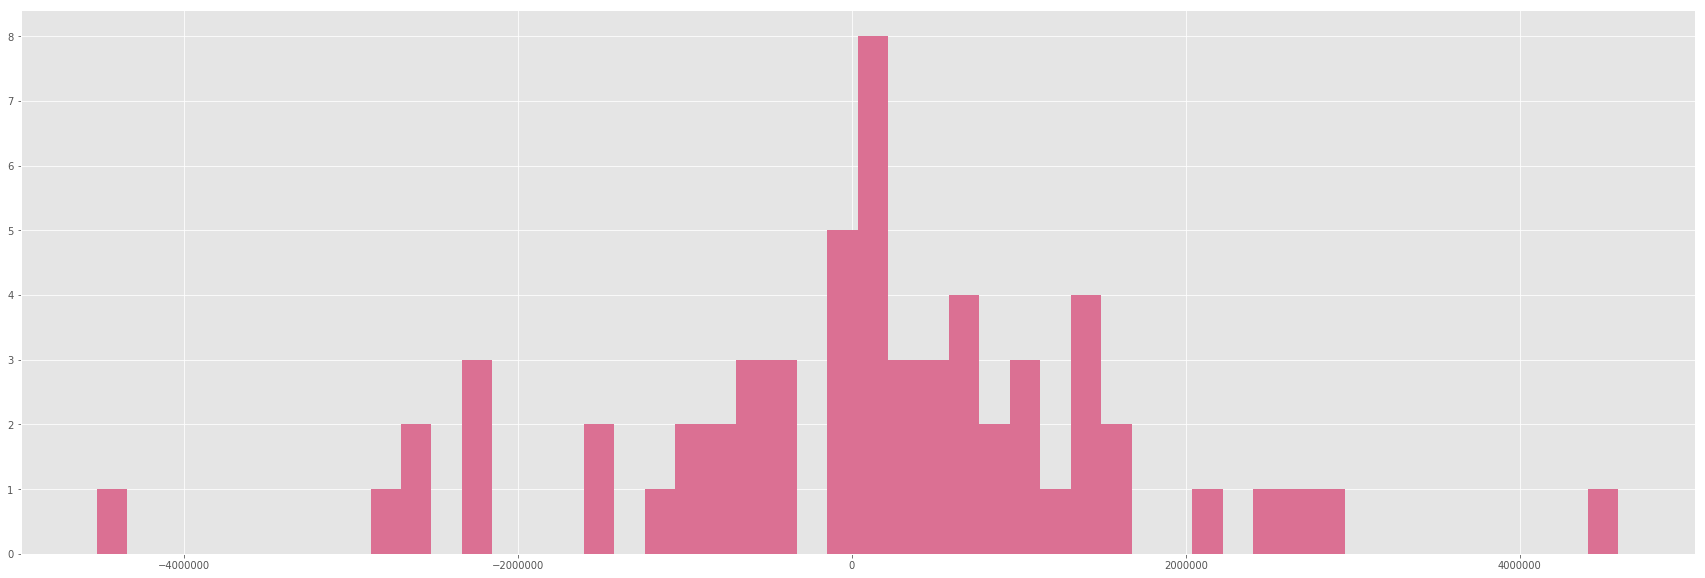

In [28]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create instance
regRF = GridSearchCV(RandomForestRegressor(),n_jobs=-1,
                  param_grid = {"min_samples_leaf":[1,2,3],
                               "max_depth":np.arange(3,20),
                               "n_estimators":[500]},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  verbose=9)
                     
                     
# Fit will test all of the combinations
regRF.fit(X_train,y_train)


print(regRF.best_params_)
print(regRF.best_score_)

regRFF = regRF.best_estimator_
# Do predictions
y_regRFF_pred = regRFF.predict(X_test)

print(np.mean(np.abs(y_test-y_regRFF_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regRFF_pred))/df_modelize3['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regRFF_pred,color = "palevioletred",bins=50);

### Finally an XGBooster

1021377.954703776
Mean error represents  -27 % from the mean value


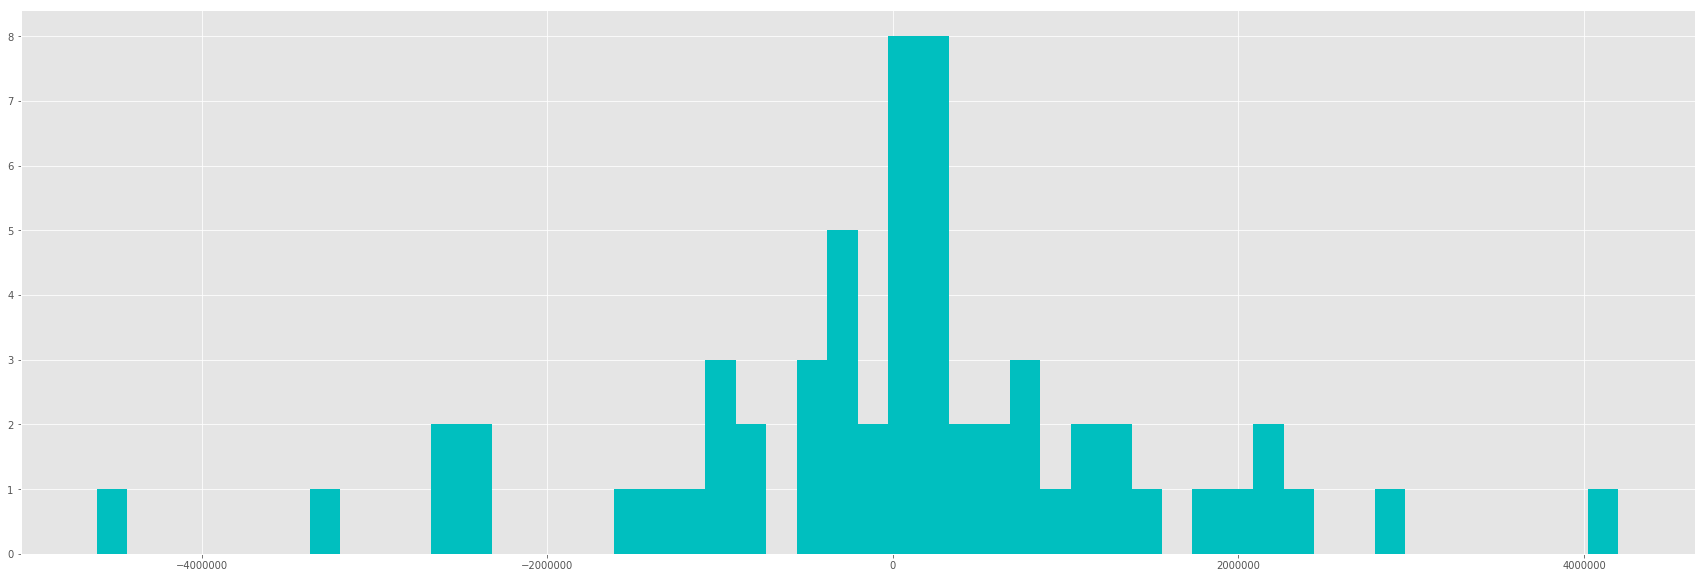

In [29]:
# Load the library
import xgboost as XGB
# Create an instance
regXGB = XGB.XGBRegressor(n_estimators=100, 
                          learning_rate=0.1, 
                          gamma=0, 
                          subsample=0.7,
                          colsample_bytree=1, 
                          max_depth=6)

# Fit the data
regXGB.fit(X_train,y_train)

# Do predictions
y_regXGB_pred = regXGB.predict(X_test)

print(np.mean(np.abs(y_test-y_regXGB_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regXGB_pred))/df_modelize3['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regXGB_pred,color = "c",bins=50);

And now with a GridSearch

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    6.5s finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'nthread': 4, 'silent': 1, 'subsample': 0.7}
-1373747.6224227562
1191671.2884114583
Mean error represents  -32 % from the mean value


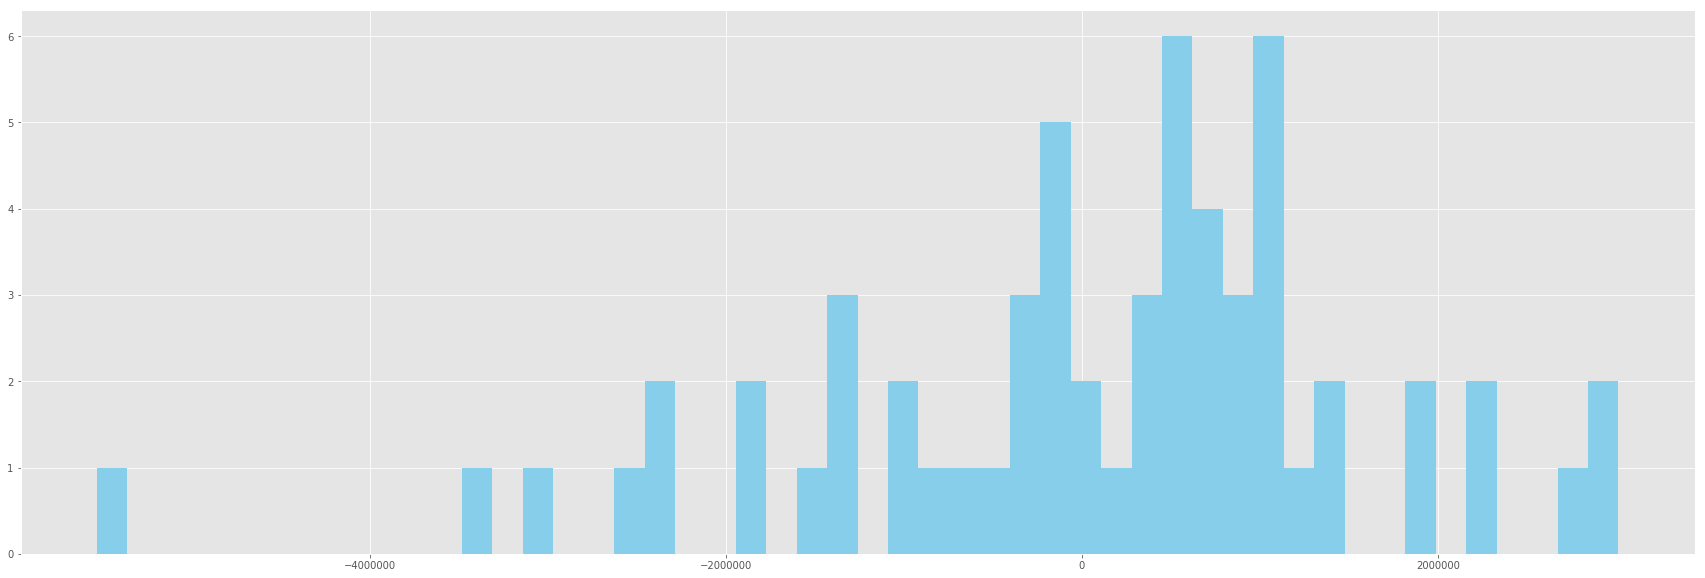

In [30]:
# Load the library
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
# Create an instance
        
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth':np.arange(3,10),
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree':np.arange(0.3,1),
              'n_estimators': [100]}

regXGBGS = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        scoring="neg_mean_absolute_error",
                        verbose=9)

# Fit the data
regXGBGS.fit(X_train,y_train)


print(regXGBGS.best_params_)
print(regXGBGS.best_score_)

regXGBGS = regXGBGS.best_estimator_

# Do predictions
y_regXGBGS_pred = regXGBGS.predict(X_test)
print(np.mean(np.abs(y_test-y_regXGBGS_pred)))
# print("Mean error represents ", round(-100*np.mean(np.abs(y_test-y_regXGBGS_pred))/y_test.mean()), "% from the mean value")
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regXGBGS_pred))/df_modelize3['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regXGBGS_pred,color = "skyblue",bins=50);

what???, how is the mean error bigger with GridSearch than without it???
Eventually, I managed to answer to this question on the next section

## But...What about the metrics?

In [44]:
#Lets compare all the metrics

print(round(-100*np.mean(np.abs(y_test-y_regL_pred))     /y_test.mean()), "% --> Linear Regressor")
print(round(-100*np.mean(np.abs(y_test-y_regKN_pred))    /y_test.mean()), "% --> KNeighbors")
print(round(-100*np.mean(np.abs(y_test-y_regGsKN_pred))  /y_test.mean()), "% --> KNeighbors with GScv")
print(round(-100*np.mean(np.abs(y_test-y_regSVR_pred))   /y_test.mean()), "% --> SVM")
print(round(-100*np.mean(np.abs(y_test-y_regDT_pred))    /y_test.mean()), "% --> Decision Tree")
print(round(-100*np.mean(np.abs(y_test-y_regRFF_pred))   /y_test.mean()), "% --> Random Forest")
print(round(-100*np.mean(np.abs(y_test-y_regXGB_pred))   /y_test.mean()), "% --> XGbooster")
print(round(-100*np.mean(np.abs(y_test-y_regXGBGS_pred)) /y_test.mean()), "% --> XGbooster with GScv")

50 % --> Linear Regressor
50 % --> KNeighbors
49 % --> KNeighbors with GScv
75 % --> SVM
34 % --> Decision Tree
31 % --> Random Forest
29 % --> XGbooster
34 % --> XGbooster with GScv


In first instance, I decided to use the MAE metric, and use it to represent the % error from the original test data set

but then , taking a look into the histograms, I realised that it would be much fore usefull to penalize the bigger errors the most. 

If my approach is correct, condensing all the error around the value 0 will improve my models prediction the most, so  I tryed the RMSE as well because since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.


In [60]:
from sklearn.metrics import mean_squared_error

print(round(100*mean_squared_error(y_test,y_regL_pred)     /y_test.mean()**2), "% --> Linear Regressor")
print(round(100*mean_squared_error(y_test,y_regKN_pred)    /y_test.mean()**2), "% --> KNeighbors")
print(round(100*mean_squared_error(y_test,y_regGsKN_pred)  /y_test.mean()**2), "% --> KNeighbors with GScv")
print(round(100*mean_squared_error(y_test,y_regSVR_pred)   /y_test.mean()**2), "% --> SVM")
print(round(100*mean_squared_error(y_test,y_regDT_pred)    /y_test.mean()**2), "% --> Decision Tree")
print(round(100*mean_squared_error(y_test,y_regRFF_pred)   /y_test.mean()**2), "% --> Random Forest")
print(round(100*mean_squared_error(y_test,y_regXGB_pred)   /y_test.mean()**2), "% --> XGbooster")
print(round(100*mean_squared_error(y_test,y_regXGBGS_pred) /y_test.mean()**2), "% --> XGbooster with GScv")

37.0 % --> Linear Regressor
37.0 % --> KNeighbors
35.0 % --> KNeighbors with GScv
79.0 % --> SVM
20.0 % --> Decision Tree
18.0 % --> Random Forest
17.0 % --> XGbooster
20.0 % --> XGbooster with GScv


It would seem that the two metrics are equal, but fixing in detail the best and worst metrics (XGbooster vs SVM) and their histograms...

We see that with the MAE the difference is 46% , while with the RMSE is 62%. 

So the second metric is more useful for this case and it is the one that I will use in the evaluation and training of the final model.

# Conclusions of the first round of models

## About the models

* **Linear Regression** gives very bad results. This was to be expected since we saw graphically the distribution of costs and energy, we already knew that there was no human way that this fit well.

* **KNeighbors** does not offer a good result either, just as bad really as the linear regression

* **SVM** retrieves the worst result of all, it could be probably improved by trying different parametres and kernels but I had all my faith in decision trees for the nature of this regression

* **Decision Tree** greatly improves the regression, not only based on the metric MAE, but also seeing the representation of the error histogram, we see that most of the errors begin to be located around zero

* As the theory predicts, a **Random Forest** improves the regression produced by a single tree, as well as the distribution of its errors. It is no secret that the generalizations that hundreds of trees can make in consensus is much better than that of just one

* **XGboost** achieves to improve the previous Random Forest result, a probable result since boosting methods depend on weights given to records in the previous samples which did not predict correctly - hence called weak learners. So the final prediction is also not a simple average (as it is in a RF) of all 100 predictions, but a weighted average.


**Difference between a RF and  XGBoost**

https://www.youtube.com/watch?time_continue=176&v=2Mg8QD0F1dQ

https://www.youtube.com/watch?time_continue=137&v=GM3CDQfQ4sw

## About the validations

**Why do we get better results without GridSearch than with it?**

This question had me in suspense for several days, but after researching, and especially some conversations with **Sebas**, 

I discovered that importing GridSearch also performed a cross validation (hence the **cv** at the end) and therefore, for not making it to the models in this first approach, I was falling into an overfitted model...

So good with this set of data, but not too much when generalizing is required.

Not a problem so far since our final model will be performed with gridsearch

In [75]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(regSVR,X_test,y_test,cv=5,scoring="neg_mean_absolute_error").mean()

## Errors taken into account for the Second Round

After finishing this first round, I attempted several times to improve the accuracy of the model.
During this process of try-error, I discovered several errors that were committing which are here condensed and they will be corrected in the final model.


* Don't using Crossvalidation for training the model
* Comparing models with MAE instead of RMSE
* Data was not scaled before modeling!!
* Dates from the column version are not continious and doesn't show all the usefull informatino possible
* Technology column was converted into a number, but it shouldn't have been!!, It should be transformed into a One-hot variable
* There are still a few rows with weird information

# Alternative approaches

Not only did I learnt what strategies could improve the final model, but also which ones would't do it.

Here we have for example a failed attemp by grouping the data just in case it would result in a better prediction... obviously not!!, there weren't enough data variance for training succesfully any model


(592, 4)


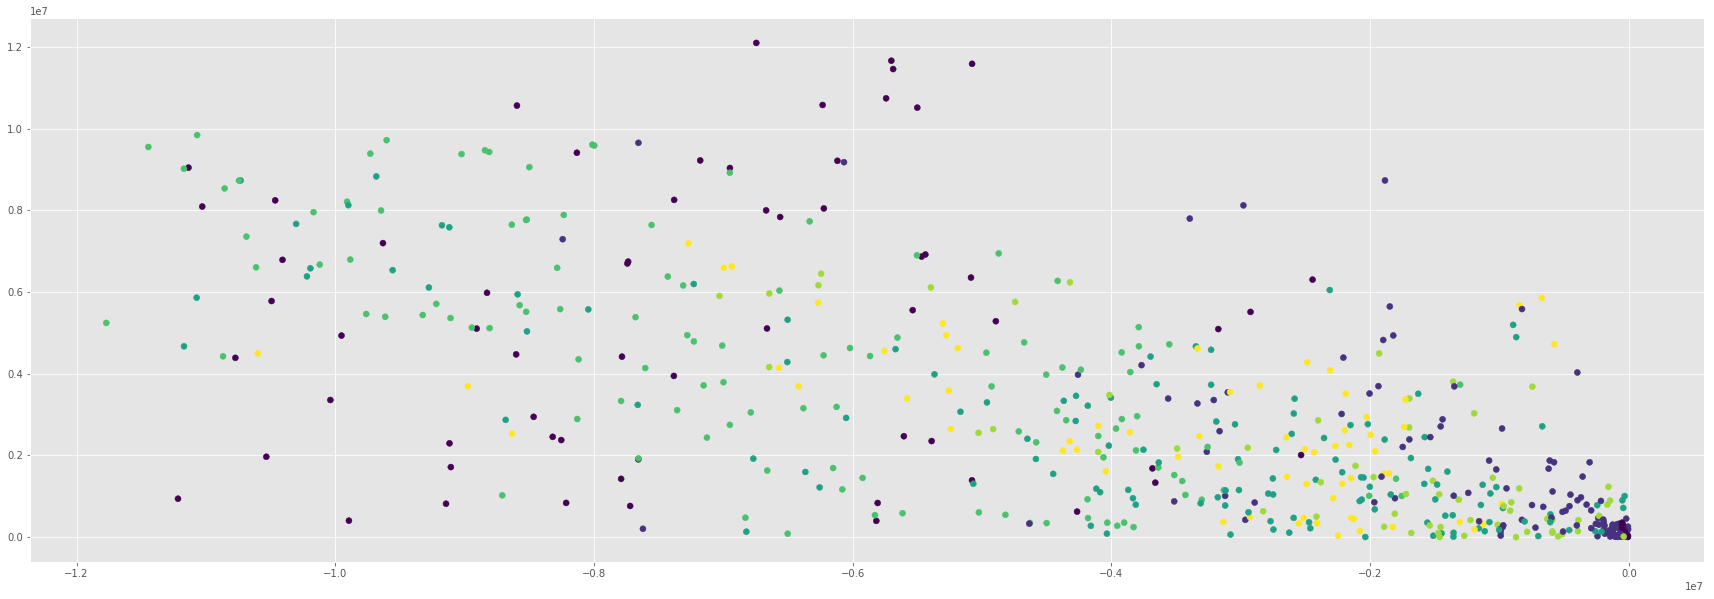

In [80]:
df_modelize4 = df_modelize3.copy()
df_modelize5 = df_modelize4[['VERSION','POWER_MWH','INTEGRAL_COSTS','NUM_TECH']].groupby(['VERSION','NUM_TECH']).sum().reset_index()

print(df_modelize4.shape)
plt.scatter(df_modelize4['INTEGRAL_COSTS'],df_modelize4['POWER_MWH'],c=df_modelize4['NUM_TECH'])



(139, 4)


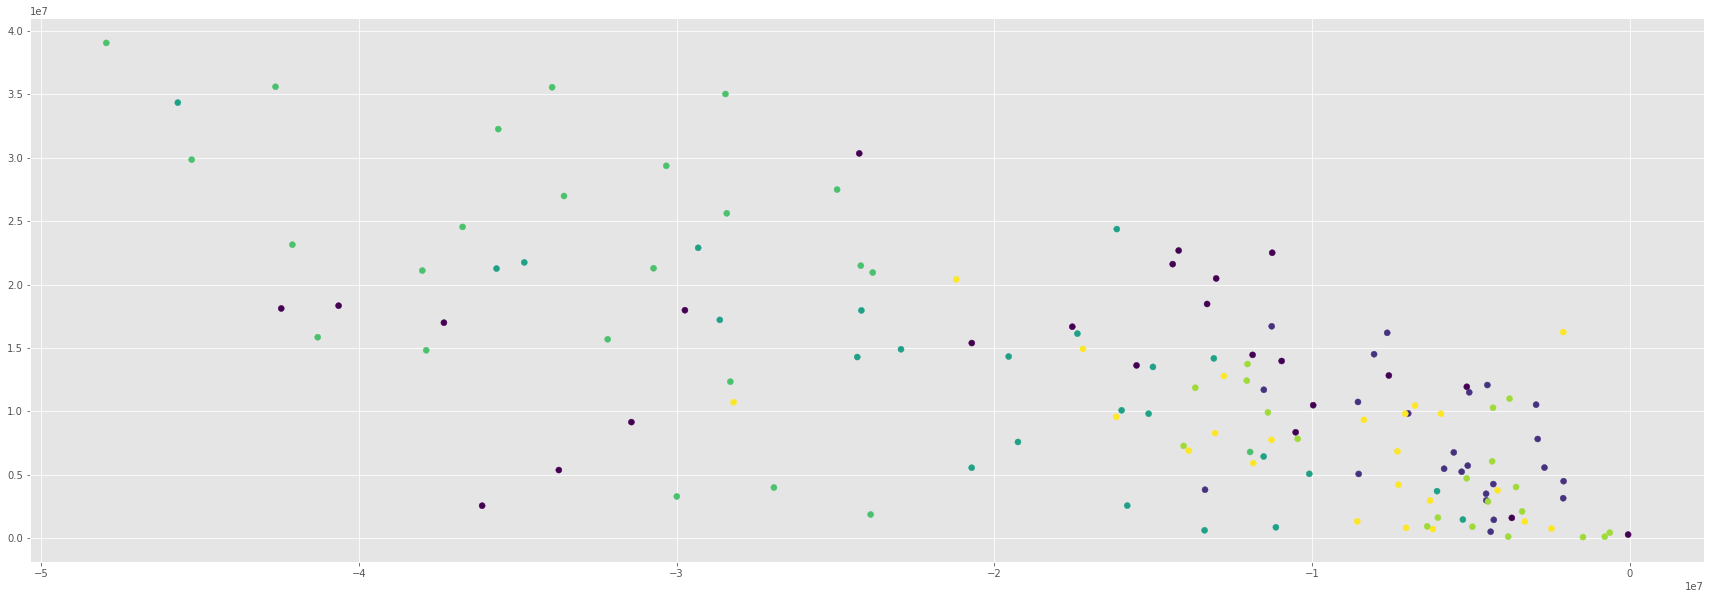

In [81]:
print(df_modelize5.shape)
plt.scatter(df_modelize5['INTEGRAL_COSTS'],df_modelize5['POWER_MWH'],c=df_modelize5['NUM_TECH'])

## Instances Creation

In [65]:
# Import Library
from sklearn.model_selection import train_test_split

X = df_modelize5[['VERSION','NUM_TECH','POWER_MWH']]
y = df_modelize5['INTEGRAL_COSTS']


# Create Instance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10 , random_state = 42)

## First aproach: Linear Regressor

5713553.0898803985
Mean error represents  -31 % from the mean value


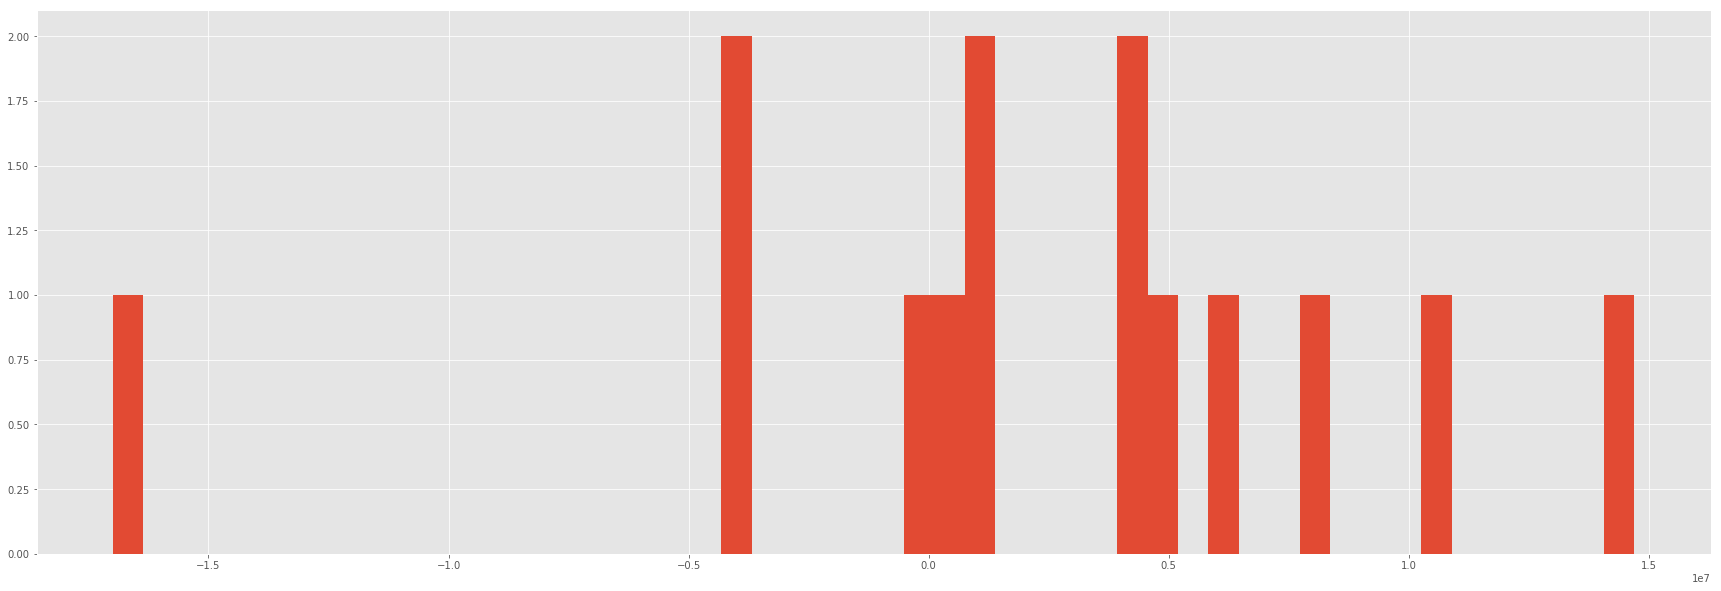

In [66]:
# Load the library
from sklearn.linear_model import LinearRegression
# Create an instance of the model
regL = LinearRegression()
# Fit the regressor
regL.fit(X_train,y_train)
# Do predictions
y_regL_pred = regL.predict(X_test)

print(np.mean(np.abs(y_test-y_regL_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regL_pred))/y_test.mean()), "% from the mean value")
plt.hist(y_test-y_regL_pred,bins=50);

## Random forest and XGBoost

In [73]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create instance
regRF = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                  param_grid = {"min_samples_leaf":np.arange(1,10),
                               "max_depth":np.arange(2,5),
                               "n_estimators":[100,150,200]},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  verbose=9)
                     
                     
# Fit will test all of the combinations
regRF.fit(X_train,y_train)


print(regRF.best_params_)
print(regRF.best_score_)

regRFF = regRF.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-6922544.4332869835, total=   2.7s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-8291950.310663542, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-5881107.122295659, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-7842077.37766442, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-6022208.754423251, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-7047554.406022251, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-8309034.539994564, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.8s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-6080960.421003283, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.2s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-7949156.957404619, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-5961277.06429816, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=200, score=-7130614.539163389, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=200, score=-8308714.502192868, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=200, score=-5997152.490401746, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=200, score=-7961139.759132446, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 .........

[CV]  max_depth=2, min_samples_leaf=4, n_estimators=200, score=-6088736.89577511, total=   0.2s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=200, score=-8008854.095234259, total=   0.2s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=200, score=-6099333.329779586, total=   0.2s
[CV] max_depth=2, min_samples_leaf=5, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=5, n_estimators=100, score=-7108770.155202941, total=   0.1s
[CV] max_depth=2, min_samples_leaf=5, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=5, n_estimators=100, score=-8418567.303845454, total=   0.1s
[CV] max_depth=2, min_samples_leaf=5, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=5, n_estimators=100, score=-5940924.857098119, total=   0.1s
[CV] max_depth=2, min_samples_leaf=5, n_estimators=100 .........

[CV]  max_depth=2, min_samples_leaf=8, n_estimators=100, score=-8523600.769492207, total=   0.1s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=100, score=-6057422.538031943, total=   0.1s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=100, score=-7803023.372709462, total=   0.2s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=100, score=-5670616.790817874, total=   0.1s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=150 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=150, score=-6662186.554449604, total=   0.2s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=150 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=150, score=-8509752.928312007, total=   0.2s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=150 ........

[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-5893214.985462294, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-8157075.368527052, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-5558913.167018127, total=   0.1s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-6855942.91224719, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-5411728.788444444, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=200, score=-5976659.280469149, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=200 .........

[CV]  max_depth=3, min_samples_leaf=5, n_estimators=150, score=-5388516.317948129, total=   0.2s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-6487211.5776267275, total=   0.2s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-8179627.095077641, total=   0.2s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-5837802.156153679, total=   0.2s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-7266385.173716693, total=   0.2s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-5297776.287500881, total=   0.2s
[CV] max_depth=3, min_samples_leaf=6, n_estimators=100 .......

[CV]  max_depth=3, min_samples_leaf=8, n_estimators=200, score=-7511409.424352746, total=   0.2s
[CV] max_depth=3, min_samples_leaf=8, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=8, n_estimators=200, score=-5449807.922879402, total=   0.2s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=3, min_samples_leaf=9, n_estimators=100, score=-6172959.230537781, total=   0.1s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=3, min_samples_leaf=9, n_estimators=100, score=-8342550.854015636, total=   0.1s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=3, min_samples_leaf=9, n_estimators=100, score=-5915125.838229989, total=   0.1s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=3, min_samples_leaf=9, n_estimators=100, score=-7553041.76109161, total=   0.1s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 .........

[CV]  max_depth=4, min_samples_leaf=3, n_estimators=100, score=-5409367.895938302, total=   0.1s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=100, score=-6878358.96677346, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=100, score=-5460822.133253467, total=   0.1s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=150, score=-5523128.935314267, total=   0.1s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=150, score=-7684138.660965723, total=   0.1s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=150, score=-5328712.016690289, total=   0.1s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=150 .........

[CV]  max_depth=4, min_samples_leaf=6, n_estimators=150, score=-7987645.595519448, total=   0.1s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=150, score=-5934013.110352249, total=   0.1s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=150, score=-7223529.859449409, total=   0.1s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=150, score=-5266680.82889144, total=   0.1s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=200, score=-5967207.004206973, total=   0.2s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=200, score=-7989672.734891317, total=   0.2s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=200 .........

[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-5950959.454999271, total=   0.1s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-8360479.097016041, total=   0.2s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-5610957.344472515, total=   0.2s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-7584507.641990995, total=   0.2s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-5604235.147123608, total=   0.2s
{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 200}
-5903814.923305282


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  2.5min finished


4432143.947697334
Mean error represents  -24 % from the mean value


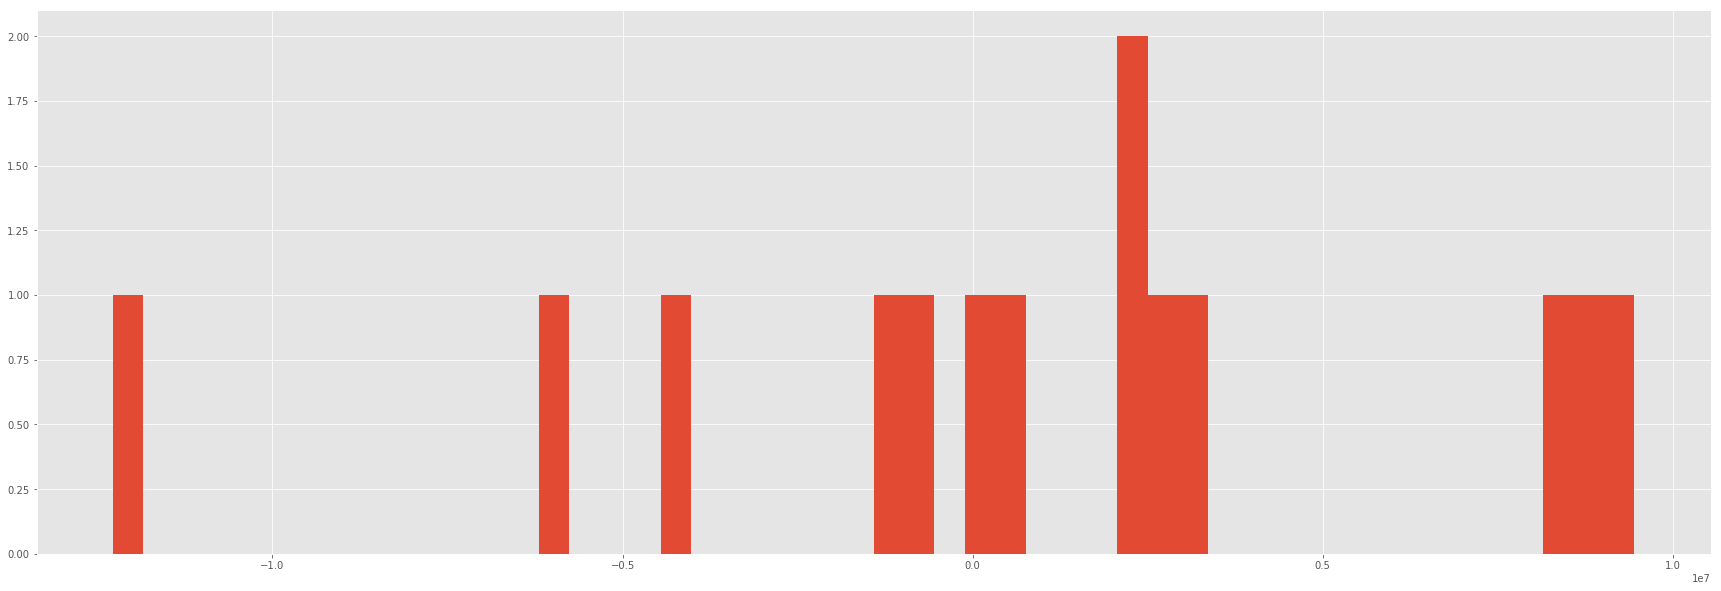

In [74]:
# Do predictions
y_regRFF_pred = regRFF.predict(X_test)
print(np.mean(np.abs(y_test-y_regRFF_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regRFF_pred))/y_test.mean()), "% from the mean value")
plt.hist(y_test-y_regRFF_pred,bins=50);

# Representation

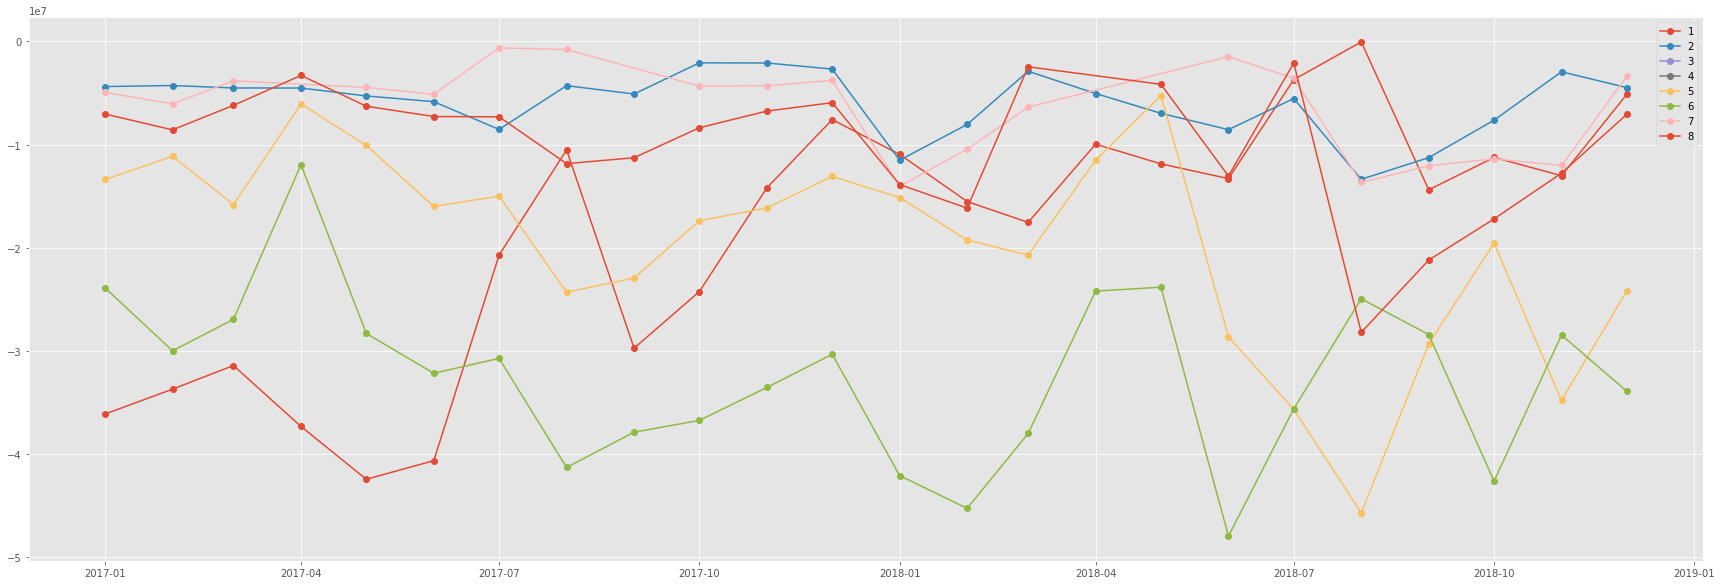

In [76]:
import numpy as np
import matplotlib.pyplot as plt

df_temp = df_modelize5
df_temp['VERSION'] = pd.to_datetime(df_modelize5['VERSION'], format='%Y%m', errors='coerce').dropna()

for i in range(1,9):
    tech = i
    plt.plot(df_temp[df_modelize5['NUM_TECH'] == tech]['VERSION'], df_temp[df_modelize5['NUM_TECH'] == tech]['INTEGRAL_COSTS'], '-o')
    legend(range(1,9))

plt.show(figsize(30,10))

7
   ID_TECNOLOGIA  NUM_TECH
0             NC         1
3             EB         2
4             BX         3
6             BP         4
8             GN         5
10            CI         6
21            HN         7
27            LN         8


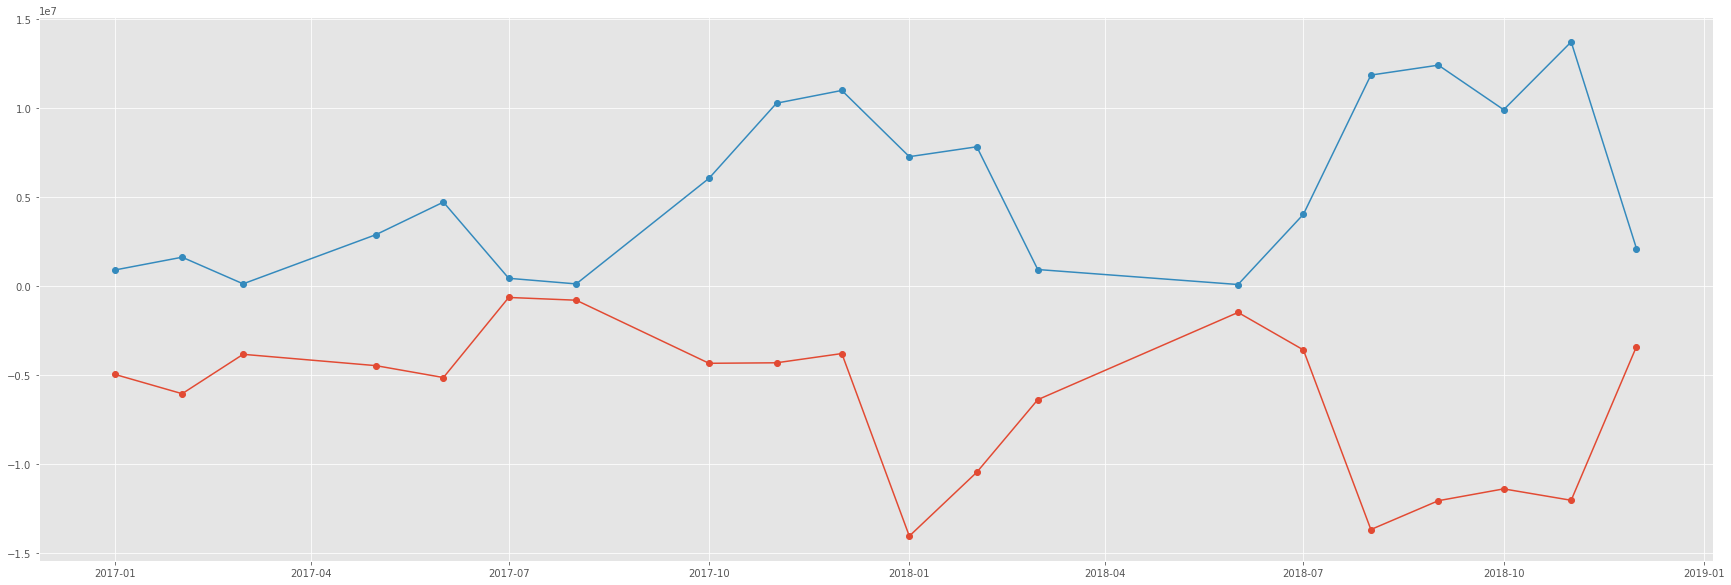

In [77]:
import numpy as np
import matplotlib.pyplot as plt

df_temp = df_modelize5
df_temp['VERSION'] = pd.to_datetime(df_modelize5['VERSION'], format='%Y%m', errors='coerce').dropna()


tech = int(input())

plt.plot(df_temp[df_modelize5['NUM_TECH'] == tech]['VERSION'], df_temp[df_modelize5['NUM_TECH'] == tech]['INTEGRAL_COSTS'], '-o')
plt.plot(df_temp[df_modelize5['NUM_TECH'] == tech]['VERSION'], df_temp[df_modelize5['NUM_TECH'] == tech]['POWER_MWH'], '-o')
print(df_tech)
plt.show(figsize(30,10))

**At first sight it may seem that the model works better than before, but it seems impossible that with so little data it can generalize well to anything that changes the data**